# IA 369 - Computação Afetiva 2S2019
# Rodolfo Luis Tonoli RA 105652
## T2 Análise de Sentimentos em Textos

### Sumário
&nbsp;&nbsp;&nbsp;&nbsp;Introdução

&nbsp;&nbsp;&nbsp;&nbsp;Instruções de Execução e Ambiente

&nbsp;&nbsp;&nbsp;&nbsp;Desenvolvimento

&nbsp;&nbsp;&nbsp;&nbsp;Resultados

&nbsp;&nbsp;&nbsp;&nbsp;Discussão


### Introdução
Este relatório contém o desenvolvimento, resultados e discussões do Problema 2: Determinação de Rótulo de Emoção. O objetivo consistiu em avaliar a emoção das sentenças da base de dados utilizada no [SemEval 2007](http://web.eecs.umich.edu/~mihalcea/affectivetext/) - 4th International Workshop on Semantic Evaluations, Task 14, Affective Tests. A base do SemEval consiste em 1250 sentenças dividas entre treino e teste. Cada sentença foi anotada por seres humanos e associado uma pontuação de 0 até 100 para cada uma das seis emoções: “anger”, “disgust”, “fear”, “joy”, “sadness”, “surprise”. A abordagem proposta nesse trabalho foi realizar a busca das palavras de cada sentença da base SemEval em outras bases de dados de palavras anotadas e, então, inferir a emoção de cada sentença. A hipótese a ser estudada no trabalho é que a soma das emoções das palavras individuais corresponde à emoção da sentença. 

A base de palavras anotadas utilizada foi a [NRC Emotion Lexicon](http://sentiment.nrc.ca/lexicons-for-research/). Outras bases como a WordNet Affect (fornecida no site do SemEval 2007) e [NRC Affect Intensity Lexicon](http://saifmohammad.com/WebPages/AffectIntensity.htm) foram exploradas mas se mostraram muito pequenas para o trabalho proposto. Bases com granularidade mais grossa ou sem uma das seis emoções do SemEval 2007 foram desconsideradas.

Não foi utilizada nenhuma técnica de aprendizado de máquina, portanto as sentenças de treino e teste foram agrupadas. A análise de cada sentença se deu seguindo os passos: dividir a sentença em palavras (tokenize); lematizar a sentença; remover palavras que não eram substantivos, verbos, adjetivos ou advérbios; procurar por cada palavra no banco de dados NRC; caso não achar, realizar a busca pelo lema da palavra; somar as emoções das palavras das sentenças e normalizar pelo valor da emoção com maior pontuação. Como resultado tem-se as emoções da sentença, cada uma pontuada de 0 até 1.

Os resultados mostraram que a hipótese não é verdadeira, confirmando as discussões realizadas durante as aulas.

### Intruções de Execução e Ambiente
Descrição do ambiente para executar o código:

&nbsp;&nbsp;&nbsp;&nbsp;- Python = 3.6.7

&nbsp;&nbsp;&nbsp;&nbsp;- Numpy = 1.16.5

&nbsp;&nbsp;&nbsp;&nbsp;- Nltk = 3.4.4

&nbsp;&nbsp;&nbsp;&nbsp;- Jupyterlab = 1.1.4

&nbsp;&nbsp;&nbsp;&nbsp;- Matplotlib = 3.1.1


Os códigos da seção de desenvolvimento correspondem aos testes das bases de dados e NÃO precisam ser executadas para gerar os resultados e gráficos utilização nas seções Resultados e Discussão. A execução de todas as células desse notebook deve demorar VÁRIOS minutos.

Para reproduzir os resultados e gráficos, basta executar a célula abaixo e as células da seção Resultados.

In [1]:
from pathlib import Path
import numpy as np
import nltk

#download nltk data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

#Development and test data from SemEval Task #14 (http://web.eecs.umich.edu/~mihalcea/affectivetext/)
testphrases_path = Path("./Base/AffectiveText.test/affectivetext_test.xml")
testmotions_path = Path("./Base/AffectiveText.test/affectivetext_test.emotions.gold")
trialphrases_path = Path("./Base/AffectiveText.trial/affectivetext_trial.xml")
trialemotions_path = Path("./Base/AffectiveText.trial/affectivetext_trial.emotions.gold")
wordnetaffect_path = Path("./Base/WordNetAffectEmotionLists/")

id_number = []
sentences = []
emotions = []
#Open dev and test data
#Open sentences
for path in [trialphrases_path, testphrases_path]:
    with open(path, 'rb') as file:
        for line in file:
            line = str(line)
            if (line.find('instance')>0):
                first = line.find('"')
                second = line.find('"', first+1)
                id_number.append(line[first+1:second])
                sentences.append(line[second+2:line.find('<',second)].replace("\\", "").replace("\\t", ""))
id_number = np.asarray(id_number)
        
#Open annotated emotions
for path in [trialemotions_path, testmotions_path]:
    with open(path, 'rb') as file:
        for line in file:
            emotions.append(list(map(int,str(line).replace("\\n","").replace("'","").split(" ")[1:7])))
emotions = np.asarray(emotions)

#Testing Wordnet database from SemEval Task #14 (http://web.eecs.umich.edu/~mihalcea/affectivetext/)
wn_anger, wn_disgust, wn_fear, wn_joy, wn_sadness, wn_surprise = [],[],[],[],[],[]
filenames = ['anger','disgust','fear','joy','sadness','surprise']
for emo_list,i in zip([wn_anger, wn_disgust, wn_fear, wn_joy, wn_sadness, wn_surprise], range(6)):
    with open(wordnetaffect_path / (filenames[i] + '.txt')) as file:
        for line in file:
            emo_list.append(line.replace("\n","").replace("_","").split(" ")[1:])
            
#Testing database NRC Affect Intensity http://saifmohammad.com/WebPages/AffectIntensity.htm
nrcAI_path = Path("./Base/NRCAffectIntensityLexicon.txt")
nrcAI = [] #stands for NRC Affect Intensity
with open(nrcAI_path) as file:
    for line in file:
        nrcAI.append(line.replace("\n","").split("\t"))
#nrcAI_lemmatized = [nrcAI[i] for i in range(len(nrcAI))]
#for i in range(len(nrcAI_lemmatized)):
#    nrc[i][0] = lemma.lemmatize(nrcAI_lemmatized[i][0])

            
#Testing another database: NRC Emotion Lexicon Word level v092 http://sentiment.nrc.ca/lexicons-for-research/
nrc_path = Path("./Base/NRCEmotionLexiconWordlevelv092.txt")
nrc = []
with open(nrc_path) as file:
    for line in file:
        nrc.append(line.replace("\n","").split("\t"))
#nrc_lemmatized = [nrc[i] for i in range(len(nrc))]
#for i in range(len(nrc_lemmatized)):
#    nrc_lemmatized[i][0] = lemma.lemmatize(nrc_lemmatized[i][0])

#Stem, Lemmatizer and Stopwords
pst = nltk.stem.PorterStemmer()
stop_words = set(nltk.corpus.stopwords.words('english'))
lemma = nltk.wordnet.WordNetLemmatizer()

[nltk_data] Downloading package punkt to C:\Users\Paula D. Paro
[nltk_data]     Costa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Paula D. Paro
[nltk_data]     Costa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Paula D. Paro
[nltk_data]     Costa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Paula D. Paro
[nltk_data]     Costa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### Desenvolvimento

Verificação da base de dados SemEval 2007 e respectivas emoções

In [20]:
#Print first 10 sentences and emotions
print('Total sentences: %d' % len(sentences))
for i in range(10):
    print('Sentence id %d: %s' %(i+1,sentences[i]))
    print('Anger: %.0f Disgust: %.0f Fear: %.0f Joy: %.0f Sadness: %.0f Surprise: %.0f' %(emotions[i][0],emotions[i][1],emotions[i][2],emotions[i][3],emotions[i][4],emotions[i][5]))

Total sentences: 1250
Sentence id 1: Mortar assault leaves at least 18 dead
Anger: 22 Disgust: 2 Fear: 60 Joy: 0 Sadness: 64 Surprise: 0
Sentence id 2: Goal delight for Sheva
Anger: 0 Disgust: 0 Fear: 0 Joy: 93 Sadness: 0 Surprise: 38
Sentence id 3: Nigeria hostage feared dead is freed
Anger: 18 Disgust: 0 Fear: 52 Joy: 66 Sadness: 20 Surprise: 65
Sentence id 4: Bombers kill shoppers
Anger: 66 Disgust: 39 Fear: 94 Joy: 0 Sadness: 86 Surprise: 0
Sentence id 5: Vegetables, not fruit, slow brain decline
Anger: 0 Disgust: 0 Fear: 25 Joy: 26 Sadness: 2 Surprise: 46
Sentence id 6: PM: Havana deal a good experiment
Anger: 0 Disgust: 0 Fear: 0 Joy: 34 Sadness: 0 Surprise: 28
Sentence id 7: Kate is marrying Doherty
Anger: 0 Disgust: 0 Fear: 0 Joy: 71 Sadness: 0 Surprise: 41
Sentence id 8: NASA revisiting life on Mars question
Anger: 0 Disgust: 0 Fear: 0 Joy: 23 Sadness: 0 Surprise: 32
Sentence id 9: Happy birthday, iPod
Anger: 0 Disgust: 0 Fear: 0 Joy: 71 Sadness: 0 Surprise: 3
Sentence id 10: 

Testando a tokenização do nltk para as sentenças da base

In [21]:
#Testing tokenization
tokenized = [[word.lower() for word in nltk.tokenize.word_tokenize(sentences[i])] for i in range(len(sentences))]
for i in range(10):
    print(sentences[i])
    print(tokenized[i])

Mortar assault leaves at least 18 dead
['mortar', 'assault', 'leaves', 'at', 'least', '18', 'dead']
Goal delight for Sheva
['goal', 'delight', 'for', 'sheva']
Nigeria hostage feared dead is freed
['nigeria', 'hostage', 'feared', 'dead', 'is', 'freed']
Bombers kill shoppers
['bombers', 'kill', 'shoppers']
Vegetables, not fruit, slow brain decline
['vegetables', ',', 'not', 'fruit', ',', 'slow', 'brain', 'decline']
PM: Havana deal a good experiment
['pm', ':', 'havana', 'deal', 'a', 'good', 'experiment']
Kate is marrying Doherty
['kate', 'is', 'marrying', 'doherty']
NASA revisiting life on Mars question
['nasa', 'revisiting', 'life', 'on', 'mars', 'question']
Happy birthday, iPod
['happy', 'birthday', ',', 'ipod']
Alonso would be happy to retire with three titles
['alonso', 'would', 'be', 'happy', 'to', 'retire', 'with', 'three', 'titles']


Primeiro teste buscando as palavras de todas as sentenças do SemEval 2007 na base WordNet Affect.

In [22]:
# (Warning! It may take a while to execute)
#First test, check how many words from sentences are found in wordnet dataset provided
#Super ineficiente, sem remover stopwords, procurando por números, pontuação e tudo mais...apenas o primeiro teste
found = []
for sentence in tokenized:
    for word in sentence:
        for emo_list,i in zip([anger, disgust, fear, joy, sadness, surprise], range(6)):
            if any(word in word_list for word_list in emo_list):
                found.append(word)
len(found)
#only 146 words from 1250 sentences found

146

Apenas 146 palavras de TODAS as sentenças foram encontradas. Verificando quantas palavras existem na base WordNet Affect:

In [23]:
#Checking number of words in the provided wordnet dataset
print('Total words in Wordnet dataset: %d' % len([word for sublist in [wn_anger, wn_disgust, wn_fear, wn_joy, wn_sadness, wn_surprise] for word in sublist]))
#only 606 words

Total words in Wordnet dataset: 606


606 palavras parece muito pouco, vou tentar realizar o stemming e o lemmatization nas sentenças para ver se encontro mais do que 146 palavras. Também removo stopwords para acelerar um pouco a busca).

In [25]:
#Removing stopwords and testing stemming and lemmatization (from the words of the sentences)
stemmed = [[pst.stem(word) for word in tokenized[i] if not word in stop_words] for i in range(len(tokenized))]
lemmatized = [[lemma.lemmatize(word) for word in tokenized[i] if not word in stop_words] for i in range(len(tokenized))]
for i in range(10):
    print(stemmed[i])
    print(lemmatized[i])

In [26]:
# (Warning! It WILL take SEVERAL minutes to execute)
# Stemming both senteces' words and wordnet dataset's words
found2 = []
def look4word_stem(word):
    for emo_list,i in zip([wn_anger, wn_disgust, wn_fear, wn_joy, wn_sadness, wn_surprise], range(6)):
            for word_list in emo_list:
                for word_list_aux in word_list:
                    if word == pst.stem(word_list_aux):
                        found2.append(word)
                        return i
for sentence,i in zip(stemmed,range(len(stemmed))):
    if i == 250:
        print('250 sentences done')
    elif i == 500:
        print('500 sentences done')
    elif i == 750:
        print('750 sentences done')
    elif i == 1000:
        print('1000 sentences done')
    for word in sentence:
        look4word_stem(word)
        
len(found2)
#only 230 words from 1250 sentences found, still not good

230

In [27]:
# (Warning! It WILL take SEVERAL minutes to execute)
# Lemmatizing both senteces' words and wordnet dataset's words
# and taking a look at which sentences no words were found in dataset
# if you don't want to print those senteces set the next line to False
printplease = True
found3 = []
def look4word_lemma(word):
    for emo_list,i in zip([anger, disgust, fear, joy, sadness, surprise], range(6)):
            for word_list in emo_list:
                for word_list_aux in word_list:
                    if word == lemma.lemmatize(word_list_aux):
                        found3.append(word)
                        return True
                    
for sentence,i in zip(lemmatized, range(len(lemmatized))):
    if i == 250:
        print('250 sentences done')
    elif i == 500:
        print('500 sentences done')
    elif i == 750:
        print('750 sentences done')
    elif i == 1000:
        print('1000 sentences done')
    flag = False
    for word in sentence:
        flag_aux = look4word_lemma(word)
        if not flag:
            flag = flag_aux
    if not flag:
        if printplease:
            print(sentence)
        
len(found3)
#only 176 words from 1250 sentences found, still not good

['mortar', 'assault', 'leaf', 'least', '18', 'dead']
['goal', 'delight', 'sheva']
['nigeria', 'hostage', 'feared', 'dead', 'freed']
['bomber', 'kill', 'shopper']
['vegetable', ',', 'fruit', ',', 'slow', 'brain', 'decline']
['kate', 'marrying', 'doherty']
['nasa', 'revisiting', 'life', 'mar', 'question']
['madonna', "'s", 'new', 'tot', "'happy", 'home', "'", 'london']
['nicole', 'kidman', 'asks', 'dad', 'help', 'stop', 'husband', "'s", 'drinking']
["'re", 'pretty', 'kind', "'bully", "'"]
['tom', 'cruise', 'katie', 'holmes', 'set', 'wedding', 'date']
['kidnapped', 'ap', 'photographer', 'freed', 'gaza']
['bush', 'insists', 'troop', 'stay', 'iraq', ',', 'predicts', 'midterm', 'victory']
['hurricane', 'paul', 'weakens', 'tropical', 'storm']
['uk', 'announces', 'immigration', 'restriction']
['three', 'found', 'alive', 'missing', 'russian', 'ship', '-report']
['poison', 'pill', 'swallow', ':', 'hawk', 'hurting', 'loss', 'vikes']
['injured', 'marathon', 'winner', 'leaf', 'hospital']
['hacker',

['tropical', 'storm', 'isaac', 'form', 'atlantic']
["'opportunity", "'", 'knock', 'geologist', "'s", 'dream', 'crater']
['squirrel', 'jump', 'boy', 'park', ';', 'rabies', 'suspected']
['girl', 'left', 'comatose', 'dental', 'visit', 'dy']
['porn', 'star', 'candidate', 'campaign', 'campus']
['school', 'end', 'football', 'season', '0-4', 'start']
['charlie', 'sheen', 'become', 'highest-paid', 'sitcom', 'star']
['jon', 'stewart', 'mock', 'benefit', 'cnn', "'s"]
['ashton', 'kutcher', 'tell', 'secret', 'ryan', 'seacrest']
['nails-on-chalkboard', 'study', 'earns', 'ig']
['gunman', "'fine", "'", 'shooting']
['marijuana', 'may', 'stave', 'alzheimer', "'s"]
['kentucky', 'seek', 'alcohol', 'huffing', 'ban']
['toddler', 'died', 'tainted', 'spinach']
['judge', 'dismisses', 'karr', "'s", 'porn', 'case']
['10', 'die', '22-hour', 'kashmir', 'standoff']
['slain', 'amish', 'girl', 'laid', 'rest']
['5,000', 'flee', 'plant', 'fire']
['cher', 'auction', 'fetch', 'double', 'pre-sale', 'estimate']
['star', '

['investigation', 'child', 'porn', 'site', 'hit', '77', 'nation']
['variety', ':', 'johnny', 'depp', 'make', 'movie', 'spy', 'poisoning']
['ice', 'storm', 'cripple', 'central', 'u.s', '.']
['park', 'star', 'united', 'maintain', 'lead']
['prehistoric', 'romeo', 'juliet', 'discovered']
['joseph', 'wambaugh', "'s", 'new', 'start']
['participant', 'water-drinking', 'contest', 'dy']
['apple', 'drop', 'bombshell', 'iphone']
['bollywood', "'s", "'brangelina", "'", 'engaged']
['shiite', 'fighter', 'arrested', 'crackdown', ',', 'iraq', 'say']
['rio', 'de', 'janeiro', 'journal', ':', 'drawing', 'line', 'across', 'sand', ',', 'class']
['model', "'", 'health', 'guideline', '--', 'help', '?']
['stepping', 'back', 'time', 'ski', 'resort']
['test', 'cricketer', 'jailed', 'killing']
['walnut', "'combat", 'unhealthy', 'fat', "'"]
['apple', 'vista', 'upgraders', ':', "'wait", "'"]
['injured', 'sarwan', 'miss', 'one-dayers']
['studio', 'sign', 'movie', 'downloads']
['asif', 'return', 'four-wicket', 'haul

['rice', ':', 'u.s.', 'wo', "n't", 'pull', 'plug', 'iraq']
['road', 'kosovo', 'independence', ',', 'warning', ':', 'go', 'slow']
['mistrial', 'officer', 'refused', 'go', 'iraq']
['rebel', 'join', 'nepal', 'parliament']
['emi', 'warns', 'profit', ',', 'bos', 'go']
['subway', 'collapse', 'caught', 'camera']
['politics-us', ':', 'reprieve', 'officer', 'denounced', '``', 'immoral', 'war', "''"]
['hunter', 'stalk', 'world', "'s", 'tallest', 'tree']
['fuel', 'spill', 'may', 'lead', 'missing', 'jet']
['sri', 'lanka', 'flood', 'displace', '60,000']
['justin', 'timberlake', ',', 'cameron', 'diaz', 'announce', 'split']
['israel', 'say', 'hope', 'keep', 'lebanon', 'border', 'calm']
['cisco', 'sue', 'apple', 'iphone', 'name']
['earthlink', 'ceo', 'dy', 'age', '49']
['star', 'dy', ',', 'family', 'feud', 'born']
['carter', 'disaster', ',', 'said', 'ford']
['super', 'bowl', 'mvp', 'manning', 'insists', "'s", 'one', 'guy']
['personal', 'health', ':', 'importance', 'knowing', 'doctor', 'talking']
['pet

['indonesian', 'bird', 'flu', 'death', 'hit', '61']
['somali', 'refugee', 'cut', 'aid']
['microsoft', 'downplays', 'vista', 'speech-recognition', 'hack']
['next', 'island', 'hot', 'spot', ':', 'st.', 'lucia']
['italy', 'hold', 'no-show', 'trial', 'bronx', 'gi', 'iraq', 'slay']
['rescued', 'boy', 'parent', 'hail', "'miracle", "'"]
['canadian', 'tracked', 'child', 'porn', 'ring']
['teen', 'hack', 'venezuelan', 'government', 'web', 'site']
['russia', 'plan', 'new', 'icbm', ',', 'nuclear', 'sub']
['study', ':', 'male', 'sweat', 'cause', 'female', 'hormone', 'rise']
['collision', 'icy', 'road', 'kill', '7']
['godfather', 'soul', 'meant']
['new', 'mar', 'orbiter', 'spot', 'pathfinder', 'landing', 'site']
['mass', 'venezuela', 'opposition', 'rally']
['glamour', '--', "'borat", "'", '--', 'golden', 'globe']
750 sentences done
['ivrea', 'journal', ':', 'italian', 'town', ',', 'civics', 'lesson', 'pelting', 'neighbor']
['iraqi', 'sunni', 'land', 'show', 'new', 'oil', 'gas', 'promise']
['princess

['mbeki', ':', '2010', 'world', 'cup', 'planning', 'track']
['clinical', 'everton', 'show', 'moyes', 'mean', 'business']
['m', 'add', 'office', '2007', 'vista', 'coupon', 'program']
['cool', 'million', 'youtube', 'founder']
['london', 'market', 'shopping', ',', 'dining']
["'jackass", "'", 'star', 'marries', 'childhood', 'friend', 'secret', 'people', 'reveal']
['microsoft', 'release', 'next', 'generation', 'phone']
['body', 'shop', "'s", 'roddick', 'hepatitis', 'c']
['teen', 'allegedly', 'armed', 'mom', 'turn', 'self']
['oxfam', ':', 'action', 'needed', 'chad']
['violence', 'continues', 'disputed', 'holy', 'site']
['storm', 'leaf', 'behind', 'major', 'travel', 'trouble']
['3', 'u.s.', 'troop', 'killed', 'hunting', 'weapon', 'cache']
['china', "'s", "'friends", "'", 'highlight', 'web', 'freedom']
['nato', ':', 'afghanistan', 'peace', "'by", '2009', "'"]
['smith', 'ca', "n't", 'buried', 'hearing']
['spacewalker', 'set', 'new', 'u.s.', 'record']
['fortune', ':', 'india', 'superpower', '?',

['salmonella', 'outbreak', 'traced', 'peanut', 'butter']
['putin', ':', 'u.s.', 'force', 'fostering', 'nuke', 'ambition']
['nuke', 'detector', 'ring', 'new', 'york', ',', 'official', 'say']
['double', 'bus-bombing', 'kill', 'three', 'lebanon']
['davydenko', 'seed', 'scattered']
['obama', ':', "'m", 'running', 'president']
['paterson', 'boot', 'scotland', 'victory']
['african-american', 'organ', 'donor', 'day', ',', 'bone', 'marrow', '?']
['guinea', 'capital', 'largely', 'calm', 'curfew', ',', 'marital', 'law']
['boss', 'sleeping', 'idea', 'letting', 'worker', 'take', 'nap']
['teacher', "'s", 'porn', 'conviction', 'spark', 'tech', 'debate']
['singapore', 'pampers', 'waterfront', 'promenade']
['rwanda', 'mull', 'three-child', 'limit']
['samsung', 'settle', 'price-fixing', 'lawsuit']
['radical', 'cleric', 'al-sadr', 'iran', ',', 'u.s.', 'insists']
['report', ':', 'harvard', 'set', 'name', 'first', 'female', 'president']
['iraq', 'unveils', 'new', 'security', 'plan']
['university', 'offer'

176

A quantidade de palavras encontradas está MUITO baixa, aumentou um pouco com o stemming mas ainda não é suficiente. Buscar pelo lema da palavra não foi muito útil mas provavelmente porque eu não inseri a função gramatical da palavra na sentença e o nltk assume que é um substantivo. De qualquer forma terei que testar com outra base.

Em seguida, teste com a base NRC Affect Intensity Lexicon.

In [30]:
# (Warning! It WILL take SEVERAL minutes to execute)
# Lemmatizing senteces' words and searching it in the NRC Affect Intensity dataset
# and taking a look at which sentences no words were found in dataset
# if you don't want to print those senteces set the next line to False
printplease = True
def look4word_nrcAI(word, lemmatize=False):
    for line in nrcAI:
        if word == line[0]:
            return True
        else:
            if lemmatize:
                if word == lemma.lemmatize(line[0]):
                    return True
#lemmatized
count = 0
countbad = 0
for sentence in lemmatized:
    flag = False
    for word in sentence:
        flag_aux = look4word_nrcAI(word, True)
        if flag_aux:
            flag = flag_aux
            count += 1
    if not flag:
        if printplease:
            print(sentence)
        countbad += 1
print(count)
print(countbad)
#1383 words from 1250 sentences found, but in 375 sentences no words were found

['kate', 'marrying', 'doherty']
["'arrogant", 'stupid', "'", 'iraq', ',', 'say', 'u', 'diplomat']
['spanish', 'journalist', 'seized', 'gaza']
['diplomat', 'acknowledges', 'u', 'arrogance', 'iraq']
['stanford', 'study', 'warns', 'internet', 'addiction']
['evidence', 'ice', 'reserve', 'moon']
['u', 'troop', 'killed', 'october', 'iraq']
['chef', 'counting', 'calorie', ',', 'study', 'find']
['game', '!', 'london', 'exhibition', 'celebrates', 'history', 'video', 'game']
['bangladesh', 'ferry', 'sink', ',', '15', 'dead']
['google', 'unveil', 'election', 'mashup']
['heavy', 'use', 'mobile', 'phone', 'make', 'men', 'infertile', ',', 'scientist', 'say']
['russian', 'ship', 'sink', 'pacific']
['question', 'credit', 'card', 'safety']
['photographer', 'kidnapping', 'condemned']
['baseball', ':', 'rogers', 'enjoys', 'muddied', 'streak']
['cultural', 'revolutionary', ',', 'ipod', 'five']
['ottawa', 'must', 'redefine', "'terror", "'"]
['britain', 'limit', 'worker', 'romania', ',', 'bulgaria']
['colle

['bill', 'gate', 'craig', 'mundie', ':', 'vista', 'secure', ',', 'employee']
['china', 'urge', 'un', 'action', 'n', 'korea']
['mbeki', 'big', 'visit', 'chinese']
['french', 'right', 'nominates', 'sarkozy']
['north', 'korea', 'claim', 'nuclear', 'test']
['talk', 'begin', 'somalia', 'peacekeeper']
['small', 'part', 'brain', ',', 'profound', 'effect']
['review', ':', 'ps3', 'pricey', 'impressive']
['machinery', 'order', 'drive', 'asia', 'upward']
['libby', 'trial', ',', 'russert', 'nbc', 'give', 'get']
['north', 'korea', 'ready', 'discus', 'first', 'step', 'nuclear', 'resolution']
['u', 'prod', 'nato', 'ally', 'troop', 'defeat', 'taliban']
['microsoft', 'support', 'openid', 'authentication', 'standard']
['buyer', 'sight', 'napster']
['china', 'say', 'rich', 'country', 'take', 'lead', 'global', 'warming']
['north', 'korea', 'may', 'begin', 'dismantle', 'nuke']
['barack', 'obama', 'formally', 'announces', 'bid', 'president']
['congressman', 'rebuke', 'u.s.', 'ally', 'lack', 'support', 'afgh

['report', ':', 'harvard', 'set', 'name', 'first', 'female', 'president']
['iraq', 'unveils', 'new', 'security', 'plan']
['university', 'offer', 'support', 'new', 'orleans', 'school']
['chart', ':', 'city', 'lean', 'lethargic', '?']
['mardi', 'gras', 'rebound', 'offing', 'new', 'orleans', '?']
['petraeus', 'take', 'command', 'iraq']
['record-shattering', 'day', 'wall', 'st', '.']
['messi', 'make', 'barcelona', 'squad', 'return']
['isinbayeva', 'set', '20th', 'world', 'record']
['toshiba', 'portege', 'r400']
['south', 'africa', 'mourns', 'adelaide', 'tambo']
['former', 'teacher', 'pose', 'playboy']
['higley', ',', 'gonzalez', 'lead', 'malaysia']
['turkmen', 'acting', 'leader', 'sworn', 'new', 'president']
['allen', 'okur', 'get', 'all-star', 'call']
['svindal', 'claim', 'golden', 'double']
['excerpt', ':', 'politician', 'press']
['beyonce', 'bikini', 'si', "'s", 'swimsuit', 'cover', 'model']
['cuban', 'official', ':', 'web', "'wild", 'colt', "'"]
['slow', "'music", 'lyric', "'"]
['lates

O resultado melhorou bastante, agora encontrou 1383 palavras. Porém, 375 sentenças não tiveram nenhuma palavra encontrada, o que ainda é um problema.

Em seguida, teste com a base NRC Emotion Lexicon, que conta com mais de 14 mil palavras anotadas.

In [33]:
# (Warning! It WILL take SEVERAL minutes to execute)
# Lemmatizing senteces' words and searching it in the NRC Emotion Lexicon dataset
# and taking a look at which sentences no words were found in dataset
# if you don't want to print those senteces set the next line to False
def look4word_nrc(word, lemmatize=False):
    for line in nrc[::10]:
        if word == line[0]:
            return True
        else:
            if lemmatize:
                if word == lemma.lemmatize(line[0]):
                    return True
#lemmatized
count = 0
countbad = 0
for sentence in lemmatized:
    flag = False
    for word in sentence:
        flag_aux = look4word_nrc(word, True)
        if flag_aux:
            flag = flag_aux
            count += 1
    if not flag:
        print(sentence)
        countbad += 1
print(count)
print(countbad)
#3598 words from 1250 sentences found, but in 38 sentences no words were found

['kate', 'marrying', 'doherty']
['madonna', "'s", 'new', 'tot', "'happy", 'home', "'", 'london']
['israel', 'insists', 'lebanon', 'overflight']
['ottawa', 'must', 'redefine', "'terror", "'"]
['toddler', 'died', 'tainted', 'spinach']
['warner', 'run', "'08"]
['toddler', 'died', 'e.', 'coli', 'tainted', 'spinach']
["'dr", '.', 'mcdreamy', "'", 'choked', "'grey", "'s", "'", 'scuffle']
['india', "'s", 'taj', 'mahal', 'get', 'facelift']
['mistrial', 'lieut', '.', 'watada']
['bebe', 'neuwirth', 'get', "'wiggle", "'"]
['participant', 'water-drinking', 'contest', 'dy']
['iphone', 'name', '?', 'surely']
['snowed', 'canadian', 'rockies']
['ps3', 'pricey', 'impressive']
['hussein', 'co-defendant', 'executed']
['blissing', 'ojai']
["'cravings", "'", 'still', ',', 'sez', 'tara']
['looking', 'beyond', 'iphone']
['french', 'right', 'nominates', 'sarkozy']
['libby', 'trial', ',', 'russert', 'nbc', 'give', 'get']
['free', ':', ',', "n't"]
['england', 'opt', 'bopara', 'loye']
['airbus', 'a380', 'superju

Quase 3600 palavras foram encontradas. Apesar de 38 sentenças não possuirem palavras na base de dados terei que seguir com essa base mesmo pois não encontrei uma maior: ao menos uma palavra foi encontrada em 97% das sentenças, portanto ela que será utilizada.

### Resultados

Utilizando a base de palavras NRC Emotion Lexicon, a seguinte célula fará a análise de cada uma das sentenças.

Cada sentença é divida em palavras usando o tokenize do nltk. Em seguida, o lema de cada palavra é extraído mas as palavras originais também são mantidas. Palavras que não cumprem função de substantivo, adjetivo, advérbio e verbo são removidas (essa remoção não é feita anteriormente para não atrapalhar a lematização). O próximo passo é a busca pela palavra original na base NRC. Caso a palavra não seja encontrada, é realizada a busca do seu lema.

Cada palavra na base NRC possui uma pontuação igual a 0 ou 1 (presente ou não presente) para as emoções:

&nbsp;&nbsp;&nbsp;&nbsp;Anger&nbsp;&nbsp;&nbsp;&nbsp;Anticipation&nbsp;&nbsp;&nbsp;&nbsp;Disgust&nbsp;&nbsp;&nbsp;&nbsp;Fear&nbsp;&nbsp;&nbsp;&nbsp;Joy&nbsp;&nbsp;&nbsp;&nbsp;Negative&nbsp;&nbsp;&nbsp;&nbsp;Positive&nbsp;&nbsp;&nbsp;&nbsp;Sadness&nbsp;&nbsp;&nbsp;&nbsp;Surprise&nbsp;&nbsp;&nbsp;&nbsp;Trust

As emoções que não adotadas pela base SemEval (Antecipation, Negative, Positive e Trust) são ignoradas.

A pontuação das emoções de cada palavra da sentença é somada e normalizada pela pontuação de maior valor. Por exemplo, dada a sentença "Cancer is bad", as palavras "cancer" e "bad" foram encontradas na base com a seguinte pontuação:

"cancer": Anger: 1 Disgust: 1 Fear: 1 Joy: 0 Sadness: 1 Surprise: 0

"bad": Anger: 1 Disgust: 0 Fear: 1 Joy: 0 Sadness: 1 Surprise: 0

Total: Anger: 2 Disgust: 1 Fear: 2 Joy: 0 Sadness: 2 Surprise: 0

Pontuação da sentença: Anger: 1 Disgust: 0.5 Fear: 1 Joy: 0 Sadness: 1 Surprise: 0


In [2]:
# (Warning! It WILL take SEVERAL minutes to execute)
def print4me(anger, disgust, fear, joy, sadness, surprise, norm_factor=1):
    """
    Print the emotions found or annotated normalized by the norm_factor.
    norm_factor = 1: no normalization
    norm_factor = 0: don't print, no emotions found
    norm_factor = -1: normalize using the max value of the emotions
    return None
    """
    if norm_factor == -1:
        norm_factor = max([anger, disgust, fear, joy, sadness, surprise])
    if norm_factor == 0:
        #norm_factor = 1
        print('No emotion found.')
    else:
        print('Anger: %.2f Disgust: %.2f Fear: %.2f Joy: %.2f Sadness: %.2f Surprise: %.2f' %(anger/norm_factor, disgust/norm_factor, fear/norm_factor, joy/norm_factor, sadness/norm_factor, surprise/norm_factor))
        
def normalize4me(anger, disgust, fear, joy, sadness, surprise, norm_factor=1):
    """
    Normalize the emotions found or annotated by the norm_factor
    norm_factor = 1 or 0: no normalization
    norm_factor = -1: normalize using the max value of the emotions
    return numpy array of normalized emotions
    """
    if norm_factor == -1:
        norm_factor = max([anger, disgust, fear, joy, sadness, surprise])
    if norm_factor == 0:
        norm_factor = 1
    return np.asarray([anger/norm_factor, disgust/norm_factor, fear/norm_factor, joy/norm_factor, sadness/norm_factor, surprise/norm_factor])

def analyseSentence(sentense, stemmize_sentence=False, lemmatize_sentense=False, lemmatize_database=False, debug=False):
    """
    Search for each word of a sentence in the NRC Emotion Lexicon Word level v092 following the steps:
    - Tokenize sentence
    - Store lemmatized sentence
    - Remove stopwords from tokenized and lemmatized sentences
    - Remove parts of speech that are NOT nouns, verbs, adjectives, or adverbs
    - Search for each non-lemmatized word in the dataset
    - If not found, search for the lemmatized word in the dataset
    return numpy array of the sum of the emotions of each word found in the dataset
    """
    def searchWord(word, lemmatize=False):
        start = len(nrc)-1
        while word[0] <= nrc[start][0][0]:
            start -= 1000
            if start < 0:
                start = 0
                break
        while word[0] < nrc[start][0][0] and start+100<len(nrc):
            if word[0] < nrc[start+100][0][0]:
                start += 100
            
        for line in np.arange(start,len(nrc),10):
            if word == nrc[line][0]:
                return np.asarray([int(nrc[i][2]) for i in np.arange(line,line+10,1)])
            else:
                if lemmatize:
                    if word == lemma.lemmatize(nrc[line][0]):
                        return np.asarray([int(nrc[i][2]) for i in np.arange(line,line+10,1)])
        return []
                
    def postagNltk2Wordnet(tag):
        """
        Converts nltk pos_tags to wordnet pos_tags
        Extracted from https://stackoverflow.com/questions/25534214/nltk-wordnet-lemmatizer-shouldnt-it-lemmatize-all-inflections-of-a-word
        """
        if tag.startswith('J'):
            return nltk.corpus.wordnet.ADJ
        elif tag.startswith('V'):
            return nltk.corpus.wordnet.VERB
        elif tag.startswith('N'):
            return nltk.corpus.wordnet.NOUN
        elif tag.startswith('R'):
            return nltk.corpus.wordnet.ADV
        else:
            return None
    
    
    if stemmize_sentence and lemmatize_sentense:
        print('Only one can be set to True')
        return -1
    tokenized = nltk.tokenize.word_tokenize(sentense)
    if lemmatize_sentense or stemmize_sentence:
        postag = nltk.pos_tag([word.lower() for word in tokenized])
        if debug: 
            print('Pos tags:')
            print(postag)
        #removing stop words
        postag_sw = [item for item in postag if not item[0] in stop_words]
        if debug: 
            print('Without Stopwords:')
            print(postag_sw)
        if lemmatize_sentense:
            processed = [word[0] for word in postag_sw if postagNltk2Wordnet(word[1])]
            processed_1 = [lemma.lemmatize(word[0], postagNltk2Wordnet(word[1])) for word in postag_sw if postagNltk2Wordnet(word[1])]
        elif stemmize_sentence:
            processed = [pst.stem(word[0]) for word in postag_sw]
    else:
        #TODO
        pass
    #Search for each word in database
    
    if debug: 
        print('Processed original:')
        print(processed)
        print('Processed lemmatized:')
        print(processed_1)
    processed_emotion = []
    atleastone = False
    for word, i in zip(processed, range(len(processed))):
        searched = searchWord(word, True)
        if len(searched)>0:
            atleastone = True
        else:
            searched = searchWord(processed_1[i], True)
            if len(searched)>0:
                atleastone = True
        processed_emotion.append(searched)
        
            
    if debug: 
        print('Found at least one word:')
        print(atleastone)
        print('Emotions per word:')
        print(processed_emotion)
    if atleastone:
        total = np.zeros(10)
        for word in processed_emotion:
            if len(word)>0:
                total += word
        return total
    else:
        return []
    
annotated = []
computed = []
for sentence,i in zip(sentences[:], range(len(sentences[:]))):
    #NRC                anger anticipation disgust fear joy negative positive sadness surprise trust
    #SemEval Task #14   anger              disgust fear joy                   sadness surprise
    #print('Sentence %d: %s' %(i, sentences[i]))
    if i == 250:
        print('250 sentences done')
    elif i == 500:
        print('500 sentences done')
    elif i == 750:
        print('750 sentences done')
    elif i == 1000:
        print('1000 sentences done')
    
    sentence_emotion = analyseSentence(sentence, lemmatize_sentense=True)
    if False: #Toggle to print
        if len(sentence_emotion) == 0:
            print('No word found in database')
        else:
            print4me(emotions[i][0], emotions[i][1], emotions[i][2], emotions[i][3], emotions[i][4], emotions[i][5], -1)
            print4me(sentence_emotion[0], sentence_emotion[2], sentence_emotion[3], sentence_emotion[4], sentence_emotion[7], sentence_emotion[8], -1)
            
            
    annotated.append(normalize4me(emotions[i][0], emotions[i][1], emotions[i][2], emotions[i][3], emotions[i][4], emotions[i][5], -1))
    if len(sentence_emotion) > 0:
        computed.append(normalize4me(sentence_emotion[0], sentence_emotion[2], sentence_emotion[3], sentence_emotion[4], sentence_emotion[7], sentence_emotion[8], -1))
    else:
        computed.append([])



250 sentences done
500 sentences done
750 sentences done
1000 sentences done


Mostrando um exemplo do processamento de uma sentença e seu resultado final:

In [4]:
#An example of the previous process
sentence_emotion=analyseSentence(sentences[0], lemmatize_sentense=True,debug=True)
result = normalize4me(sentence_emotion[0], sentence_emotion[2], sentence_emotion[3], sentence_emotion[4], sentence_emotion[7], sentence_emotion[8], -1)
print('Resultado Final')
print(result)

Pos tags:
[('mortar', 'NN'), ('assault', 'NN'), ('leaves', 'VBZ'), ('at', 'IN'), ('least', 'JJS'), ('18', 'CD'), ('dead', 'JJ')]
Without Stopwords:
[('mortar', 'NN'), ('assault', 'NN'), ('leaves', 'VBZ'), ('least', 'JJS'), ('18', 'CD'), ('dead', 'JJ')]
Processed original:
['mortar', 'assault', 'leaves', 'least', 'dead']
Processed lemmatized:
['mortar', 'assault', 'leave', 'least', 'dead']
Found at least one word:
True
Emotions per word:
[array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0]), array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), [], []]
Resultado Final
[1. 0. 1. 1. 0. 0.]


Comparando os resultados com as anotações do SemEval 2007

In [5]:
count = 0
count_noemotion = 0
count_noemotion_annotated = 0
count_noemotion_annotated2 = 0
count_noemotion_annotated3 = 0
for i in range(len(computed)):
    if len(computed[i]) == 0:
        count+=1
    else:
        if sum(computed[i]) == 0:
            count_noemotion += 1
    if sum(emotions[i]) == 0:
        count_noemotion_annotated += 1
    if sum(emotions[i]) < 50:
        count_noemotion_annotated2 += 1
    if max(emotions[i])<=20:
        count_noemotion_annotated3 += 1
print('Sentences without words in dataset: %d' % count) #29
print('Sentences with words in dataset but no emotion in the words found: %d' % count_noemotion) #261
print('Annotated sentences with no emotion: %d' % count_noemotion_annotated) #4
print('Annotated sentences with sum of emotions smaller than 50: %d' % count_noemotion_annotated2) #246
print('Annotated sentences with no emotion higher than 20: %d' % count_noemotion_annotated3) #148

Sentences without words in dataset: 29
Sentences with words in dataset but no emotion in the words found: 261
Annotated sentences with no emotion: 4
Annotated sentences with sum of emotions smaller than 50: 246
Annotated sentences with no emotion higher than 20: 148


29 sentenças não tiveram nenhuma palavra identificada na base NRC. Esse valor é menor do que o apresentado na seção Desenvolvimento pois lá a lematização foi feita sem informação gramatical da palavra, ou seja, assumia que toda palavra era um substantivo.

Além disso, em 261 sentenças, ao menos uma palavra foi encontrada na base mas a somatória de suas emoções foi igual a zero. Ou seja, nessas sentenças, as palavras encontradas possuiam todas as emoções não presentes (igual a zero). Comparando com as anotações da SemEval 2007, 148 sentenças possuiam uma pontuação menor que 20 para todas as emoções, o que pode indicar uma frase neutra ou sem nenhuma emoção intensa.

Na próxima análise, foram identificadas sentenças que possuem apenas uma emoção predominante nas anotações do SemEval 2007 e no modelo proposto. Então foi comparado se a emoção predominante de cada frase da anotação e do modelo eram correspondentes.

In [6]:
count = 0
countwrongs = 0
countcorrects = 0
for i in range(len(emotions)):
    #if at least one word was found
    if len(computed[i]) > 0:
        highest_emotion_annotated = np.where(emotions[i] == np.amax(emotions[i]))[0]
        highest_emotion_computed = np.where(computed[i] == np.amax(computed[i]))[0]
        if len(highest_emotion_annotated)>1 or len(highest_emotion_computed)>1:
            count+=1
        else:
            if highest_emotion_annotated == highest_emotion_computed:
                countcorrects += 1
            else:
                countwrongs+=1
    else:
        count+=1
print('Number of sentences: %d' % len(emotions))
print('Results not evaluated: %d' % count)
print('Results with the same predominat emotion: %d' % countcorrects)
print('Results with different predominat emotion: %d' % countwrongs)

Number of sentences: 1250
Results not evaluated: 741
Results with the same predominat emotion: 76
Results with different predominat emotion: 433


Apenas 509 sentenças tinham uma emoção predominante tanto nas anotações quanto no modelo. Dessas, apenas 76 (15%) possuiram correspondência de animações. Apesar dessa porcetagem ser equivalente a atribuir uma emoção para cada face de um dado e jogá-lo ao acaso, o critério utilizado foi altamente excludente. Ou seja, foi excluído da análise casos em que "sadness" e "anger" eram igualmente predominantes do modelo e apenas "anger" era predominante nas anotações do SemEval 2007, por exemplo.

Normalizando as anotações do SemEval 2007 e assumindo que as emoções são vetores de um espaço com seis dimensões, foi feita a análise da distância Euclidiana das emoções resultantes do modelo proposto e das anotações. Além disso, a análise do módulo da maior diferença entre emoções da mesma sentença é apresentada. Ambas análises são apresentadas na forma de histogramas.

In [7]:
count = 0
distance = []
absolute = []
for i in range(len(emotions)):
    #if at least one word was found
    if len(computed[i]) > 0:
        distance.append(np.linalg.norm(annotated[i] - computed[i]))
        absolute.append(max(np.abs(annotated[i] - computed[i])))
    else:
        count+=1
distance = np.asarray(distance)
absolute = np.asarray(absolute)
print('Results not evaluated: %d' % count)
#print(distance)
#print(absolute)

Results not evaluated: 29


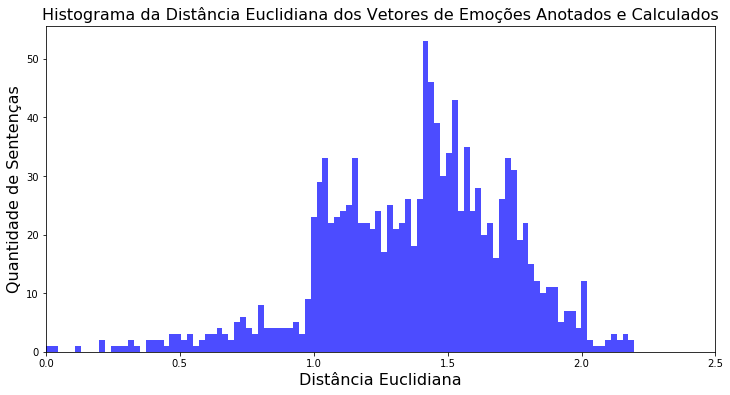

In [155]:
import matplotlib.pyplot as plt
%matplotlib inline
font = {
        'size': 16,
        }
fig, ax = plt.subplots(figsize=(12, 6))
plt.hist(distance, 100, facecolor='blue', alpha=0.7)
plt.title('Histograma da Distância Euclidiana dos Vetores de Emoções Anotados e Calculados', fontdict=font)
plt.ylabel('Quantidade de Sentenças', fontdict=font)
plt.xlabel('Distância Euclidiana', fontdict=font)
plt.xlim((0,2.5))
plt.show()

O resultado ideal do histograma apresentado seria uma distância euclidiana igual a zero para todas as sentências, indicando que os valores de emoções do modelo proposto está idêntico aos valores anotados do SemEval 2007, ou ao menos uma distribuição com o pico próximo de zero e decaindo conforme o eixo x. Porém, a distribuição está mais próxima do valor máximo da distância (2,49) que corresponde ao caso onde os valores das emoções estão todos invertidos.

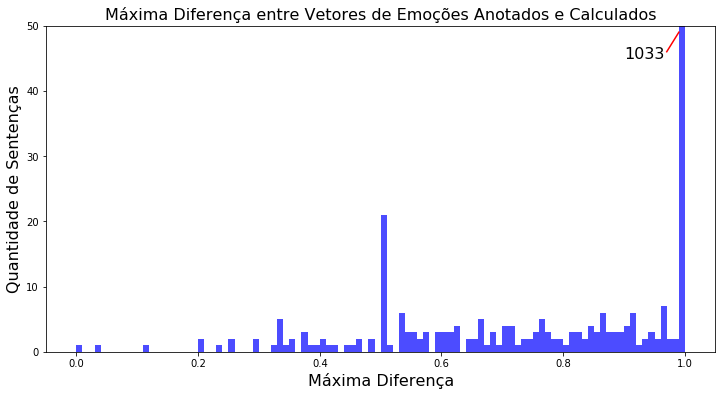

In [151]:
fig, ax = plt.subplots(figsize=(12, 6))
n, bins, patches = plt.hist(absolute, 100, facecolor='blue', alpha=0.7)
plt.ylim((0,50))
plt.title('Máxima Diferença entre Vetores de Emoções Anotados e Calculados', fontdict=font)
plt.ylabel('Quantidade de Sentenças', fontdict=font)
plt.xlabel('Máxima Diferença', fontdict=font)
number = int(n[-1])
plt.text(0.9, 45, str(number), fontdict=font)
plt.plot([0.97,0.99],[46,49], color='red')
plt.show()

Esse outro histograma mostra que, para 1033 sentenças de 1250, ao menos uma emoção foi erroneamente identificada ou erroneamente não identificada pelo modelo proposto. Idealmente, essa distribuição estaria perto de zero no eixo x.

### Discussão

O modelo proposto tinha por objetivo classificar emoções de sentenças através por busca individual de palavras em uma base de dados anotadas. Os resultados do modelo se mostraram expressivamente diferentes daqules anotados por seres humanos. Derrubando, assim, a hipótese levantada de que seria possível inferir as emoções de uma sentença a partir das emoções individuais de suas palavras. Tais resultados estão de acordo com as discussões realizadas em sala de aula.

A base de dados NRC utilizada não se mostrou muito efetiva, apesar da quantidade de palavras. Um caso que me chamou atenção foi a palavra "winning", que está anotada com "disgust" um, "joy" um, "sadness" um, e "surprise" um. O que afetou a identificação de frases como "'Stomp the Yard' has winning moves in its weekend debut". Dois principais pontos fracos do modelo proposto são: a análise individual das palavras, apesar da extração do lema ter contribuido para um maior reconhecimento de palavras na base NRC, a análise individual ainda não consegue extrair corretamente emoções de sentenças como "não estou feliz"; o segundo ponto fraco é a dependência de uma base de dados que contenha as palavras das sentenças, mas a anotação dessas palavras sem contexto ainda irá apresentar problemas como o exemplo de "winning".